<a href="https://colab.research.google.com/github/mdnm18/Advanced-Programming-Practice-Tutorials/blob/main/Parallel_Programming_paradigm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARALLEL PROGRAMMING PARADIGM
Parallel programming can be divided into two major types based on how memory is accessed:

1.   Shared Memory Model
2.   Distributed Memory Model


# Shared Memory Model
1.In the shared memory model, all processors (or threads) share the same global memory.
2.Threads communicate by reading/writing shared variables.


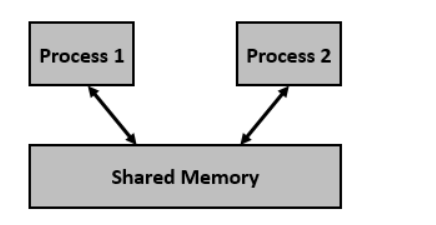
# Figure 1. Shared Memory Model

In [ ]:
import threading

# Shared data (global variable)
shared_list = []

# Lock to prevent data corruption (race condition)
lock = threading.Lock()

def append_numbers(thread_id):
    for i in range(5):
        with lock:  # synchronize access to shared memory
            shared_list.append((thread_id, i))
    print(f"Thread {thread_id} finished.")

threads = []

# Create multiple threads sharing same memory
for t in range(3):
    thread = threading.Thread(target=append_numbers, args=(t,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

print("Final Shared List:", shared_list)


Thread 0 finished.
Thread 1 finished.
Thread 2 finished.
Final Shared List: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]


In the above program, All threads access the same list (shared memory).
Lock() ensures no two threads modify the list at the same time.
Demonstrates synchronization and shared state.


**Explanation of the above program**

1. import threading

Brings in Python’s threading module so you can create threads and synchronization primitives (like Lock).

2. shared_list = []

A global list allocated in the main thread’s memory.
All threads will be able to access and modify this same list — this is the “shared memory”.

3. lock = threading.Lock()

Creates a mutual-exclusion lock (mutex). Only one thread can hold the lock at a time.
We use it to prevent concurrent modifications that could corrupt shared data or cause incorrect behavior.

4. def append_numbers(thread_id):

Defines the function each thread will run.

for i in range(5): — loop five times (i = 0..4).

with lock: — acquire the lock before entering the block; automatically release it when the block exits (even if an error occurs). This is shorthand for lock.acquire() / try/finally: lock.release().

shared_list.append((thread_id, i)) — append a tuple identifying which thread appended which value.

print(f"Thread {thread_id} finished.") — a final message from that thread (prints may interleave across threads).

Why put only the append under the lock? Because we need to protect the critical section where shared memory is modified. Keeping the locked region small reduces contention.

5. threads = []

A Python list to keep references to the Thread objects. We need those references to call .join() later.

6. Creating and starting threads
For t = 0, 1, 2:

Thread(...) creates a thread object that will run append_numbers(t).

thread.start() tells the OS/Python scheduler to begin executing that thread immediately (concurrently with the main thread). start() does not wait for the thread to finish.

At this point three threads are running concurrently and will execute the append_numbers function.

7. for thread in threads: thread.join()

join() blocks the main thread until that specific thread finishes.
This ensures the main program waits until all worker threads have completed before continuing to print the final list.

8. print("Final Shared List:", shared_list)

Runs after all threads have finished. By design we expect 3 threads × 5 items = 15 tuples in the list.
Important: the order of items is not guaranteed. Threads run interleaved by the OS scheduler, so the appended tuples will likely be mixed (e.g., (0,0), (1,0), (0,1), ...).

9. What Lock() prevents (race condition example)

A race condition occurs when two or more threads access and modify shared data at the same time causing incorrect results.
Example problem (if we did a non-atomic read-modify-write on shared state):

# Distributed Memory Model

Each processor has its own local memory.Processors cannot access each other’s memory directly.They communicate by sending and receiving messages.Used in clusters or networked computers.

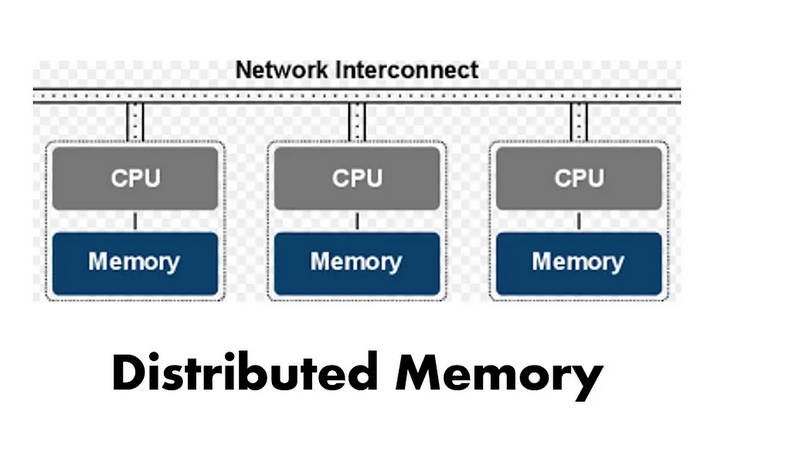


#Figure 2. Distributed Memory Model

In [ ]:
from multiprocessing import Process, Queue

def worker(task_id, queue):
    result = f"Task {task_id} processed"
    queue.put(result)  # send message to main process

if __name__ == "__main__":
    queue = Queue()
    processes = []

    for i in range(3):
        p = Process(target=worker, args=(i, queue))
        processes.append(p)
        p.start()

    for p in processes:
        p.join()

    # Collect results from all processes
    results = [queue.get() for _ in processes]
    print("Results from distributed processes:", results)


Results from distributed processes: ['Task 0 processed', 'Task 1 processed', 'Task 2 processed']


1.   Each process has its own memory (independent).
2.   They communicate through the queue, simulating message passing (like MPI).
3.   No shared variables here.
